## Observations and Insights

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata = "Data/Mouse_metadata.csv"
study_results = "Data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="left")

combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Create reference for calcualtions later on
study_df = pd.DataFrame(combined_df)
study_df



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


## Summary statistics
* Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

In [3]:
sum_table = pd.DataFrame(combined_df.groupby("Drug Regimen").count())

sum_table["Mean Tumor Volume"] = pd.DataFrame(combined_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean())
sum_table["Median Tumor Volume"] = pd.DataFrame(combined_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median())
sum_table["Tumor Volume Variance"] = pd.DataFrame(combined_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var())
sum_table["Tumor Volume Std. Dev."] = pd.DataFrame(combined_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std())
sum_table["Tumor Volume Std. Err."] = pd.DataFrame(combined_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem())
sum_table = sum_table[["Mean Tumor Volume", "Median Tumor Volume", "Tumor Volume Variance", "Tumor Volume Std. Dev.", "Tumor Volume Std. Err."]]

sum_table.head()

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


## Bar plots
* Generate a bar plot showing number of data points for each treatment regimen using pandas

* Generate a bar plot showing number of data points for each treatment regimen using pyplot

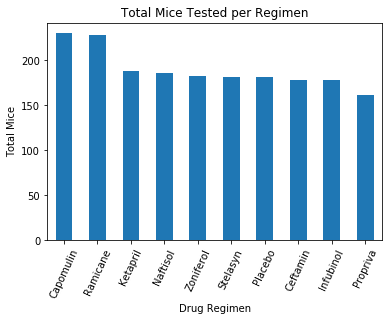

<Figure size 864x360 with 0 Axes>

In [4]:
#Using pandas to create a bar plot to display number of data points for each treatment regimen 

reg_df = study_df['Drug Regimen'].value_counts()
reg_df.head()

reg_df.plot(kind='bar')
plt.title("Total Mice Tested per Regimen")
plt.ylabel("Total Mice")
plt.xlabel("Drug Regimen")
plt.xticks(rotation=65)
plt.figure(figsize=(12,5))


plt.show()

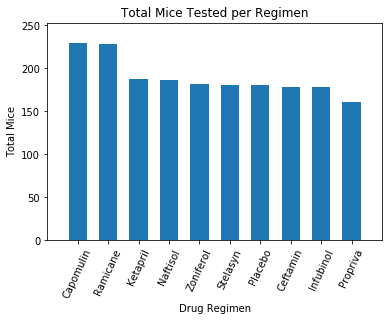

In [5]:
#Using Matplotlib's pyplot create a bar plot to display number of data points for each treatment regimen 

plt.bar(range(len(reg_df)),reg_df,width=0.6)
plt.xticks(range(len(reg_df)),reg_df.index, rotation = 65)

plt.xlim(-1,len(reg_df))
plt.ylim(0,reg_df.max()*1.1)
plt.xlabel("Drug Regimen")
plt.ylabel("Total Mice")
plt.title("Total Mice Tested per Regimen")


plt.show()

## Pie plots
* Generate a pie plot showing the distribution of female versus male mice using pandas

* Generate a pie plot showing the distribution of female versus male mice using pyplot


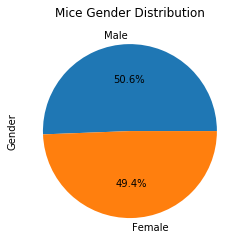

In [6]:
#With pandas create a pie plot showing the distribution of female versus male mice 

gen_df = study_df["Sex"].value_counts()
gen_df.plot.pie(autopct = "%1.1f%%")
plt.ylabel("Gender")
plt.title("Mice Gender Distribution")

plt.show()

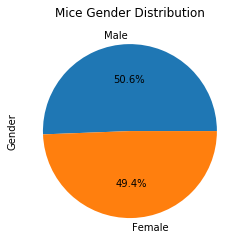

In [7]:
#With pyplot create a pie plot shwoing the distribution of female versus male mice 

plt.pie(gen_df, labels = gen_df.index, autopct = "%1.1f%%")

plt.ylabel("Gender")
plt.title("Mice Gender Distribution")

plt.show()


## Quartiles, outliers and boxplots
* Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers.

* Generate a box plot of the final tumor volume of each mouse across four regimens of interest

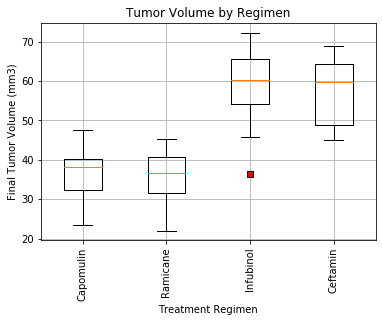

In [11]:
#filter data to get a reduced dataframe of only relavant data needed

reduced_df = study_df.groupby("Mouse ID").max()[["Drug Regimen","Timepoint"]]

final_tumor_vol = []

for mouse in reduced_df.index:
    new_df = study_df[study_df["Mouse ID"] == mouse]
    new_df = new_df[new_df["Timepoint"] == reduced_df.loc[mouse]["Timepoint"]]
    final_tumor_vol.append(new_df["Tumor Volume (mm3)"].sum())

reduced_df["Final Tumor Volume (mm3)"] = final_tumor_vol

tv_dict = {}

tv_dict["Capomulin"] = list(reduced_df[reduced_df["Drug Regimen"] == "Capomulin"]["Final Tumor Volume (mm3)"])
tv_dict["Ramicane"] = list(reduced_df[reduced_df["Drug Regimen"] == "Ramicane"]["Final Tumor Volume (mm3)"])
tv_dict["Infubinol"] = list(reduced_df[reduced_df["Drug Regimen"] == "Infubinol"]["Final Tumor Volume (mm3)"])
tv_dict["Ceftamin"] = list(reduced_df[reduced_df["Drug Regimen"] == "Ceftamin"]["Final Tumor Volume (mm3)"])

final_tumor_df = pd.DataFrame(tv_dict)

#Generate the box plot of final tumor volume of each mouse across the four regimens 

red_square = dict(markerfacecolor='r', marker='s')
fig1, ax1 = plt.subplots()
ax1.boxplot(final_tumor_df.T, flierprops = red_square )
plt.xticks(range(1,len(final_tumor_df.columns)+1),final_tumor_df.columns, rotation = 90)
plt.ylabel("Final Tumor Volume (mm3)")
plt.xlabel("Treatment Regimen")
plt.title("Tumor Volume by Regimen")
plt.grid()
plt.show()



## Line and Scatter Plots
